# Feature Selection

Feature selection is the process of selecting a subset of significant feature for better model construction. Often feature can be not important _enough_ for a model, and can therefore be tossed out without little to no loss to the model. And by occam's razor, this is a preferrable strategy.

It should be noted that if an insignificant feature is removed, the overall performance of the model may go down, but it insignificant. A insignificant features only improve model performance due to what is effectively just noise.

**Why is Feature Selection Important?**

* Reduced training time due to the elimination or redundent or unimportant features.
* Reduced over fitting because less things are used to describe a penomena, and so things become more generalized.
* (Likely) improved overall performance due to the above. 

## Random Forest Based Feature Selection

Random forests allow us to qualitatively measure the relative importance of each feature.

**How does this work?**

Recall in the node splitting process for decision trees, features are chosen in the splitting process using a metric like mutation information, or gini impurity to determine the quality of a split. Feature importance in a random forest takes this same metric, and averages the result each feature impurity across all trees in the forest. This imples that each feature carries a distribution of impurity values. More precisely, this is a weighted average. Recall the logarithmic time complexity of constructing a tree due to the continous subdivision and partitioning effect that is done. Hence a feature or node further down in the tree will have few training instances associated with it - and hence it should be valued to a smaller degree.

The results gives us a pretty measure of how effective a feature/branch was (and hence more oftenly chosen) in the forest. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


dataset = load_digits()
X, y = dataset.data, dataset.target

random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
random_forest.fit(X, y)

# feature importances: index = feature, value = weight of importance
# the higher the weight, the more important the feature
importances = random_forest.feature_importances_

# assign an index that defines the sort position, reverse for descending order
# this way, we assign the original index (which is the feature name) to be in order
indices = np.argsort(importances)[::-1]

# print the feature ranking
for rank in indices:
    print(f'Feature rank: {rank}, score: {importances[rank]}')

Feature rank: 21, score: 0.04922280346227523
Feature rank: 26, score: 0.04339488614934009
Feature rank: 43, score: 0.041187070718076264
Feature rank: 36, score: 0.039796088457971196
Feature rank: 42, score: 0.03759886741435654
Feature rank: 28, score: 0.03285099153272587
Feature rank: 20, score: 0.03188886394967972
Feature rank: 30, score: 0.031742910130827445
Feature rank: 61, score: 0.02969257560900765
Feature rank: 33, score: 0.029423314200886407
Feature rank: 27, score: 0.02857383892929682
Feature rank: 10, score: 0.028164917024861395
Feature rank: 38, score: 0.02800644242451898
Feature rank: 13, score: 0.027686680439047155
Feature rank: 19, score: 0.02699442190917519
Feature rank: 29, score: 0.026732124222611633
Feature rank: 34, score: 0.025112288741548625
Feature rank: 54, score: 0.024409390633263542
Feature rank: 53, score: 0.02393171935067039
Feature rank: 60, score: 0.022980893273868125
Feature rank: 46, score: 0.021842987053666427
Feature rank: 2, score: 0.02125146148273246


Every tree within a random forest classifier carries its own `feature_importances_`. A random forest classifier takes these results and averages them to obtain its final score. Back tracking, we can obtain obtain the distribution of every feature and its score.

|   .       |   tree 1    | tree 2      | tree 3      | ...    | tree n      |
|-----------|-------------|-------------|-------------|--------|-------------| 
| feature 1 | score_{0,0} | score_{1,0} | score_{2,0} | ...    | score_{m,0} | 
| feature 2 | score_{1,0} |     ...     |    ...      | ...    |    ...      | 
| feature 3 | score_{2,0} |     ...     |    ...      | ...    |    ...      | 
| ...       | ...         |     ...     |    ...      | ...    |    ...      | 
| feature n | score_{n,0} |     ...     |    ...      | ...    | score_{n,m} |


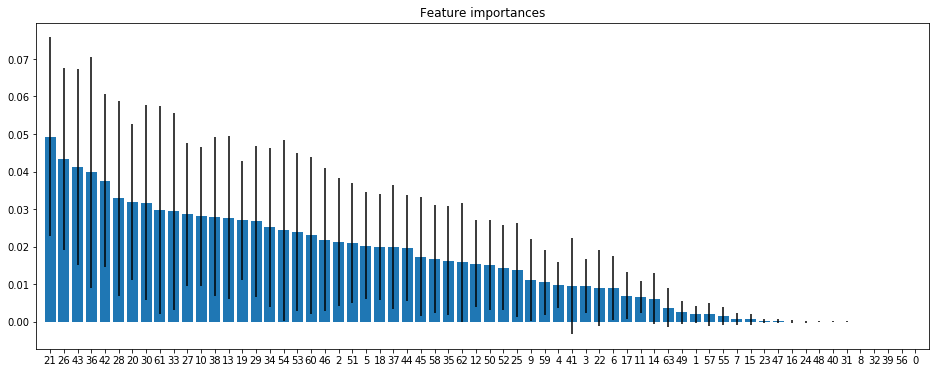

In [3]:
import matplotlib.pyplot as plt

# plot the feature importances of the forest
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
n_r, n_c = X.shape
plt.figure(figsize=(16, 6))
plt.title("Feature importances")
plt.bar(x=range(n_c), height=importances[indices], yerr=std[indices], align="center")
plt.xticks(range(n_c), indices)
plt.xlim([-1, n_c])
plt.show()

A neat caveat with images is that we can associate feature importance (color) to position (pixel) within an associated image.

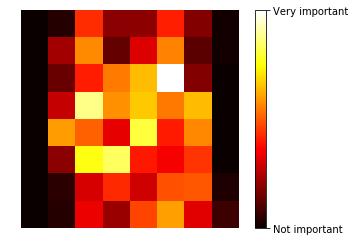

In [5]:
import matplotlib as mpl


feature_strength_im = random_forest.feature_importances_.reshape(8, 8)
plt.imshow(feature_strength_im, cmap=mpl.cm.hot, interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

## L1-based Regularization Feature Selections

